<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/b%C3%A0i_t%E1%BA%ADp_tu%E1%BA%A7n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fbce04b9d0a3e20e24adf015fb17804495ba1bd091e74fcd4e2028ba0fbc2c57
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


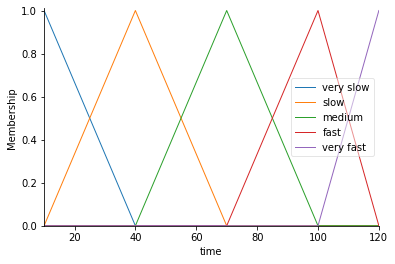

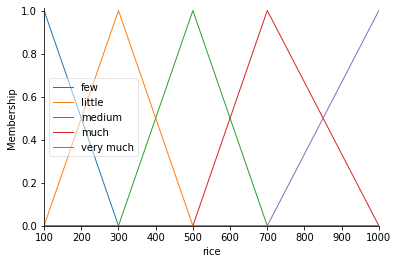

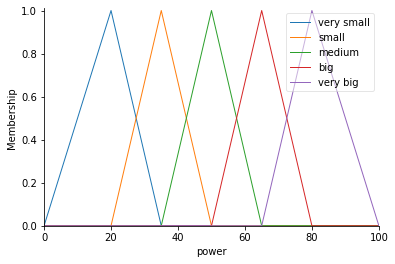

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,5),'time')
rice = ctrl.Antecedent(np.arange(100,1001,5),'rice')
power = ctrl.Consequent(np.arange(0,101,5),'power')
#Antecedent:đầu vào
#Consequent:kết quả 
time['very slow'] = fuzz.trimf(time.universe,[10,10,40])
time['slow'] = fuzz.trimf(time.universe,[10,40,70])
time['medium'] = fuzz.trimf(time.universe,[40,70,100])
time['fast'] = fuzz.trimf(time.universe,[70,100,120])
time['very fast'] = fuzz.trimf(time.universe,[100,120,120])
rice['few'] = fuzz.trimf(rice.universe,[100,100,300])
rice['little'] = fuzz.trimf(rice.universe,[100,300,500])
rice['medium'] = fuzz.trimf(rice.universe,[300,500,700])
rice['much'] = fuzz.trimf(rice.universe,[500,700,1000])
rice['very much'] = fuzz.trimf(rice.universe,[700,1000,1000])
power['very small'] = fuzz.trimf(power.universe,[0,20,35])
power['small'] = fuzz.trimf(power.universe,[20,35,50])
power['medium'] = fuzz.trimf(power.universe,[35,50,65])
power['big'] = fuzz.trimf(power.universe,[50,65,80])
power['very big'] = fuzz.trimf(power.universe,[65,80,100])
time.view()
rice.view()
power.view()


35.00000000000001


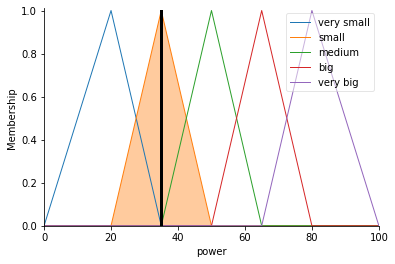

In [3]:
rule1 =  ctrl.Rule( time['very slow'] & rice['few'], power['very small'])
rule2 =  ctrl.Rule( time['very slow'] & rice['little'], power['very small'])
rule3 =  ctrl.Rule( time['very slow'] & rice['medium'], power['small'])
rule4 =  ctrl.Rule( time['very slow'] & rice['much'], power['small'])
rule5 =  ctrl.Rule( time['very slow'] & rice['very much'], power['medium'])
rule6 =  ctrl.Rule( time['slow'] & rice['few'], power['very small'])
rule7 =  ctrl.Rule( time['slow'] & rice['little'], power['very small'])
rule8 =  ctrl.Rule( time['slow'] & rice['medium'], power['small'])
rule9 =  ctrl.Rule( time['slow'] & rice['much'], power['medium'])
rule10 =  ctrl.Rule( time['slow'] & rice['very much'], power['medium'])
rule11 =  ctrl.Rule( time['medium'] & rice['few'], power['very small'])
rule12 =  ctrl.Rule( time['medium'] & rice['little'], power['small'])
rule13 =  ctrl.Rule( time['medium'] & rice['medium'], power['medium'])
rule14 =  ctrl.Rule( time['medium'] & rice['much'], power['big'])
rule15 =  ctrl.Rule( time['medium'] & rice['very much'], power['very big'])
rule16 =  ctrl.Rule( time['fast'] & rice['few'], power['small'])
rule17 =  ctrl.Rule( time['fast'] & rice['little'], power['medium'])
rule18 =  ctrl.Rule( time['fast'] & rice['medium'], power['big'])
rule19 =  ctrl.Rule( time['fast'] & rice['much'], power['very big'])
rule20 =  ctrl.Rule( time['fast'] & rice['very much'], power['very big'])
rule21 =  ctrl.Rule( time['very fast'] & rice['few'], power['big'])
rule22 =  ctrl.Rule( time['very fast'] & rice['little'], power['big'])
rule23 =  ctrl.Rule( time['very fast'] & rice['medium'], power['very big'])
rule24 =  ctrl.Rule( time['very fast'] & rice['much'], power['very big'])
rule25 =  ctrl.Rule( time['very fast'] & rice['very much'], power['very big'])
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 100
powering.input['rice'] = 100
powering.compute()
print(powering.output['power'])
power.view(sim=powering)